# Import das bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Preparar os dados para processamento

In [4]:
file_path = './dataset.csv'
df_all = pd.read_csv(file_path)
df_all = df_all.drop(columns=['Unnamed: 0'])

In [5]:
print("Primeiras linhas da Tabela:")
display(df_all.head())

Primeiras linhas da Tabela:


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
display(df_all['track_genre'].unique())

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [7]:
def categorize_genre(genre):
    categories = {
        'Pop': ['pop', 'k-pop', 'j-pop', 'dance pop', 'power-pop', 'indie-pop', 'synth-pop', 'mandopop', 'cantopop'],
        'Rock': ['rock', 'alternative', 'punk', 'metal', 'punk-rock', 'psych-rock', 'j-rock', 'rockabilly', 'rock-n-roll', 'alt-rock', 'hard-rock', 'grunge', 'emo', 'indie'],
        'Eletrônica e Hip Hop': ['hip hop', 'hip-hop', 'rap', 'trap','electronic', 'edm', 'house', 'techno', 'progressive-house', 'minimal-techno', 'trance', 'detroit-techno', 'deep-house', 'chicago-house', 'breakbeat', 'drum-and-bass', 'dubstep', 'electro', 'idm'],
        'Clássica': ['classical', 'opera'],
        'Dance': ['dance', 'disco', 'party', 'club'],
        'MPB': ['mpb', 'sertanejo', 'pagode'],
        'Música para Relaxar': ['chill', 'sleep', 'study', 'new-age'],
        'Funk': ['funk', 'groove'],
        'Outros': []
    }

    genre_lower = genre.lower()
    for category, genres in categories.items():
        if any(g in genre_lower for g in genres):
            return category
    return 'Outros'

df_all['category'] = df_all['track_genre'].apply(categorize_genre)

Precisamos categorizar nosso dataset para restringir a quantidade de dados e credibilizar nossa pesquisa. Isso irá agilizar as requisições à API do Spotify, que possui um limite que pode aumentar o tempo de obtenção de dados essenciais. Com essa abordagem, podemos reduzir as atuais 100 mil linhas para 18 mil, focando especificamente no gênero rock, o que facilitará tanto a análise quanto a eficiência do processo.

In [8]:
df_rock = df_all[df_all['category']  == 'Rock']
display(df_rock.head())
print(df_rock.shape)
new_file_path = './rock_dataset.csv'
df_rock.to_csv(new_file_path, index=False)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,category
2000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,...,1,0.0329,0.0678,0.149000,0.123,0.337,85.012,4,alt-rock,Rock
2001,2Y0iGXY6m6immVb2ktbseM,MGMT,Little Dark Age,Little Dark Age,83,299960,False,0.705,0.712,6,...,1,0.0385,0.0102,0.000855,0.100,0.620,97.512,4,alt-rock,Rock
2002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,...,0,0.0300,0.0484,0.000417,0.286,0.370,93.986,4,alt-rock,Rock
2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.0495,0.017700,0.101,0.398,124.053,4,alt-rock,Rock
2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,...,0,0.0542,0.1860,0.079100,0.152,0.387,88.036,4,alt-rock,Rock


(18000, 21)


# Codigo das requisicoes feitas

In [9]:
# import requests
# import pandas as pd
# import time
# import os

# # Função para autenticação na API do Spotify
# def get_spotify_token(client_id, client_secret):
#     auth_url = 'https://accounts.spotify.com/api/token'
#     auth_response = requests.post(auth_url, {
#         'grant_type': 'client_credentials',
#         'client_id': client_id,
#         'client_secret': client_secret,
#     })

#     if auth_response.status_code != 200:
#         raise Exception(f"Failed to authenticate. Status code: {auth_response.status_code}. Reason: {auth_response.text}")

#     auth_response_data = auth_response.json()
#     return auth_response_data['access_token']

# # Função para buscar informações de uma faixa pelo track_id
# def get_track_info(track_id, token):
#     url = f"https://api.spotify.com/v1/tracks/{track_id}"
#     headers = {
#         "Authorization": f"Bearer {token}"
#     }

#     try:
#         response = requests.get(url, headers=headers)
#     except requests.exceptions.ConnectionError as e:
#         print(f"Connection error: {e}. Retrying in 10 seconds...")
#         time.sleep(10)
#         return get_track_info(track_id, token)

#     if response.status_code == 429:
#         retry_after = int(response.headers.get('Retry-After', 1))
#         print(f"Rate limit exceeded. Retrying after {retry_after} seconds...")
#         time.sleep(retry_after)
#         return get_track_info(track_id, token)

#     if response.status_code != 200:
#         print(f"Failed to fetch track info for {track_id}. Status code: {response.status_code}")
#         return None

#     return response.json()

# # Função principal
# def update_csv_with_release_date(csv_path, client_id, client_secret, save_every=10):
#     # Autenticar na API do Spotify
#     token = get_spotify_token(client_id, client_secret)

#     # Verificar se já existe um CSV atualizado
#     if os.path.exists('updated_tracks.csv'):
#         df_updated = pd.read_csv('updated_tracks.csv')
#         print("Carregando progresso anterior...")
#     else:
#         df_updated = pd.read_csv(csv_path)
#         df_updated['release_date'] = None

#     # Obter índices das músicas que ainda não têm data de lançamento
#     df_to_update = df_updated[df_updated['release_date'].isnull()]

#     # Iterar sobre cada linha restante para buscar a data de lançamento
#     for index, row in df_to_update.iterrows():
#         track_id = row['track_id']
#         print(f"Fetching data for track ID: {track_id}...")

#         # Buscar informações da faixa pela API
#         track_info = get_track_info(track_id, token)

#         if track_info and 'album' in track_info and 'release_date' in track_info['album']:
#             release_date = track_info['album']['release_date']
#             df_updated.at[index, 'release_date'] = release_date
#             print(f"Track ID: {track_id}, Release Date: {release_date}")
#         else:
#             print(f"No release date found for track ID: {track_id}.")

#         # Salvar progresso a cada N músicas processadas
#         if (index + 1) % save_every == 0:
#             df_updated.to_csv('updated_tracks.csv', index=False)
#             print(f"Progress saved after {index + 1} tracks.")

#     # Salvar o CSV final atualizado
#     df_updated.to_csv('updated_tracks.csv', index=False)
#     print("Arquivo atualizado salvo como 'updated_tracks.csv'.")

# # Exemplo de uso
# if __name__ == "__main__":
#     # Substitua pelos seus valores de client_id e client_secret
#     client_id = ''
#     client_secret = ''

#     # Caminho para o arquivo CSV com a coluna 'track_id'
#     csv_path = 'rock_dataset.csv'

#     # Atualizar o CSV com as datas de lançamento
#     update_csv_with_release_date(csv_path, client_id, client_secret)

Após o processo de requisições, é essencial medir a qualidade dos dados, verificando a ausência de valores nulos. Também devemos definir os campos necessários para a análise, especificando seus tipos. Essa etapa garantirá que possamos realizar uma análise precisa e confiável.

In [10]:
# Carregar o arquivo CSV atualizado
df = pd.read_csv('./updated_tracks.csv')
df = df.drop(columns=['Unnamed: 0'])

print("\nChecando valores nulos:")
display(df.isnull().sum())


Checando valores nulos:


track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
category            0
release_date        0
dtype: int64

In [11]:
print("\nChecando tipos de dados:")
display(df.dtypes)


Checando tipos de dados:


track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
category             object
release_date         object
dtype: object

# Limpeza e tranformacao dos dados
Para avançar com a pesquisa, precisamos transformar a coluna release_date no formato '%Y-%m-%d', já que isso facilitará a análise da progressão anual da popularidade do rock. Vamos dividir essa coluna em três derivadas, cada uma contendo informações sobre ano, mês e dia, evitando o tratamento contínuo da string para Date. Além disso, removeremos alguns gêneros que o Spotify categoriza de forma inadequada, pois algumas músicas não se enquadram no escopo do rock. É importante observar que, devido à falta de padronização das datas no nosso CSV, algumas podem conter apenas ano-mês ou apenas ano, o que pode resultar em dados nulos; no entanto, esses casos serão tratados durante o processo de data mining.

In [12]:
# Remover linhas com valores ausentes
df = df.dropna(subset=['popularity', 'release_date'])
# Remover Generos desnecessários a nossa análise\
df = df[(df['track_genre'] != 'indie') & (df['track_genre'] != 'alternative') & (df['track_genre'] != 'emo')]
# Extrair o ano da coluna 'release_date'
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month
df['release_day'] = pd.to_datetime(df['release_date'], errors='coerce').dt.day

df['release_year'] = df['release_year'].astype('Int64')
df['release_month'] = df['release_month'].astype('Int64')
df['release_day'] = df['release_day'].astype('Int64')
df['popularity'] = df['popularity'].astype('Int64')


# Remover linhas com valores nulos na coluna 'release_year'
display(df.isnull().sum())


track_id               0
artists                0
album_name             0
track_name             0
popularity             0
duration_ms            0
explicit               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
track_genre            0
category               0
release_date           0
release_year        1189
release_month       1189
release_day         1189
dtype: int64

In [13]:
print("\nChecando tipos de dados:")
display(df.dtypes)


Checando tipos de dados:


track_id             object
artists              object
album_name           object
track_name           object
popularity            Int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
category             object
release_date         object
release_year          Int64
release_month         Int64
release_day           Int64
dtype: object

# Inicio da analise

No início da nossa análise, pretendemos comparar a popularidade das músicas com o ano de lançamento. O Spotify classifica a popularidade de uma faixa em uma escala de 0 a 100, onde valores mais altos indicam maior popularidade. Essa métrica é gerada com base na quantidade de visualizações e na recência das faixas. Em geral, a popularidade tende a ser maior para lançamentos mais novos, e essa informação pode revelar tendências emergentes no mercado musical, influenciando as estratégias de divulgação das músicas.

Com isso em mente, utilizaremos a regressão linear para traçar uma linha de tendência ao longo dos anos, analisando a média de hits do gênero rock. Essa abordagem nos permitirá identificar os principais indicadores de popularidade ao longo do tempo e compreender melhor como o rock se posiciona nas dinâmicas do mercado musical.

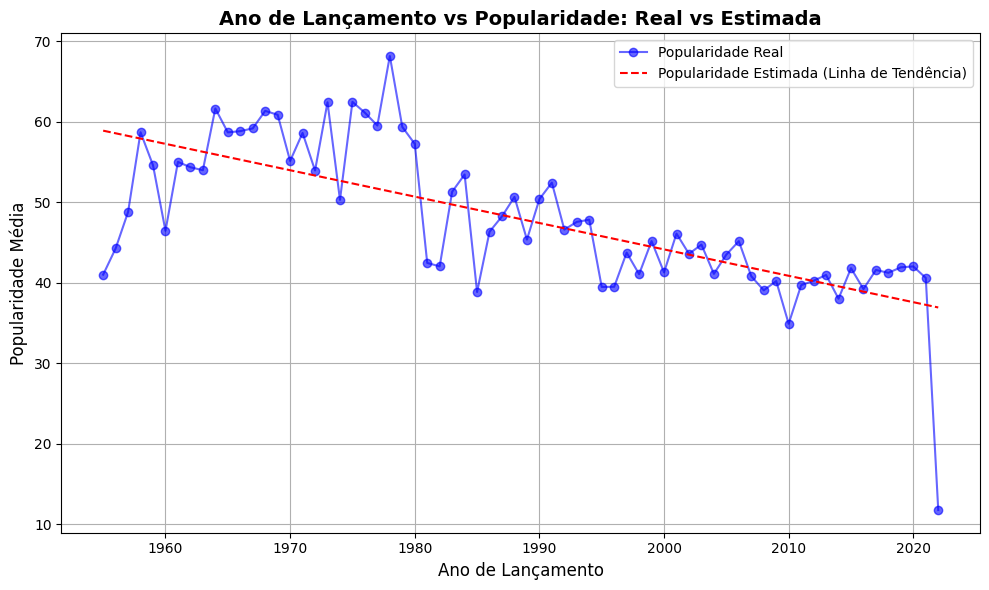

-0.3276515603242621

In [14]:
df_year_popularity = df.groupby('release_year')['popularity'].mean()

df_years = df_year_popularity.index.values.reshape(-1, 1)
y_popularity = df_year_popularity.values

reg_model_year = LinearRegression()
reg_model_year.fit(df_years, y_popularity)

y_pred_year = reg_model_year.predict(df_years)

plt.figure(figsize=(10, 6))

# Gráfico de linhas para popularidade real ao longo dos anos
plt.plot(df_years, y_popularity, color='blue', label='Popularidade Real', marker='o', alpha=0.6)

# Adicionar a linha de tendência (Popularidade Estimada)
plt.plot(df_years, y_pred_year, color='red', label='Popularidade Estimada (Linha de Tendência)', linestyle='--')

plt.title('Ano de Lançamento vs Popularidade: Real vs Estimada', fontsize=14, fontweight='bold')
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Popularidade Média', fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

coef_year = reg_model_year.coef_[0]

coef_year

Os resultados da nossa análise revelam informações importantes sobre a relação entre a popularidade das músicas de rock e o ano de lançamento. O coeficiente de -0.33 indica que, a cada ano adicional, há uma tendência de diminuição na popularidade, sugerindo que faixas mais antigas tendem a ser mais populares.
Além disso, o Erro Médio Absoluto (MAE) de 4.57 e o Erro Médio Quadrático (MSE) de 42.02 indicam que, em média, nossas previsões de popularidade apresentam uma discrepância moderada em relação aos valores reais, com o MSE enfatizando penalizações para erros maiores. Por fim, o coeficiente de determinação (R²) de 0.50 sugere que 50% da variação na popularidade das músicas pode ser explicada pelo ano de lançamento, indicando uma relação significativa, mas também uma quantidade considerável de variabilidade não capturada por nosso modelo. Esses indicadores nos fornecem uma base sólida para entender como a popularidade do rock evolui ao longo do tempo.

In [15]:
# Calcular métricas de avaliação
mae = mean_absolute_error(y_popularity, y_pred_year)
mse = mean_squared_error(y_popularity, y_pred_year)
r2 = r2_score(y_popularity, y_pred_year)

# Exibir as métricas
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')
print(f'Erro Médio Quadrático (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R^2): {r2:.2f}')

Erro Médio Absoluto (MAE): 4.57
Erro Médio Quadrático (MSE): 42.02
Coeficiente de Determinação (R^2): 0.50


O gráfico de violino demonstra a distribuição da popularidade por década de lançamento, evidenciando como essa variação se transformou ao longo do tempo. Nas décadas de 1950 a 1970, a popularidade é relativamente concentrada, sugerindo uma estabilidade nos níveis de sucesso dos lançamentos. A partir dos anos 1980, a variabilidade aumenta, indicando uma maior diversidade na recepção do público. Nas décadas mais recentes, especialmente nos anos 2000 e 2020, a distribuição se torna ainda mais dispersa e irregular, refletindo a crescente ramificação de tendências, influenciada em grande parte pela forma como consumimos música devido ao streaming. Isso sugere que, com o passar do tempo, o sucesso dentro do gênero tornou-se mais difícil de alcançar de forma consistente.

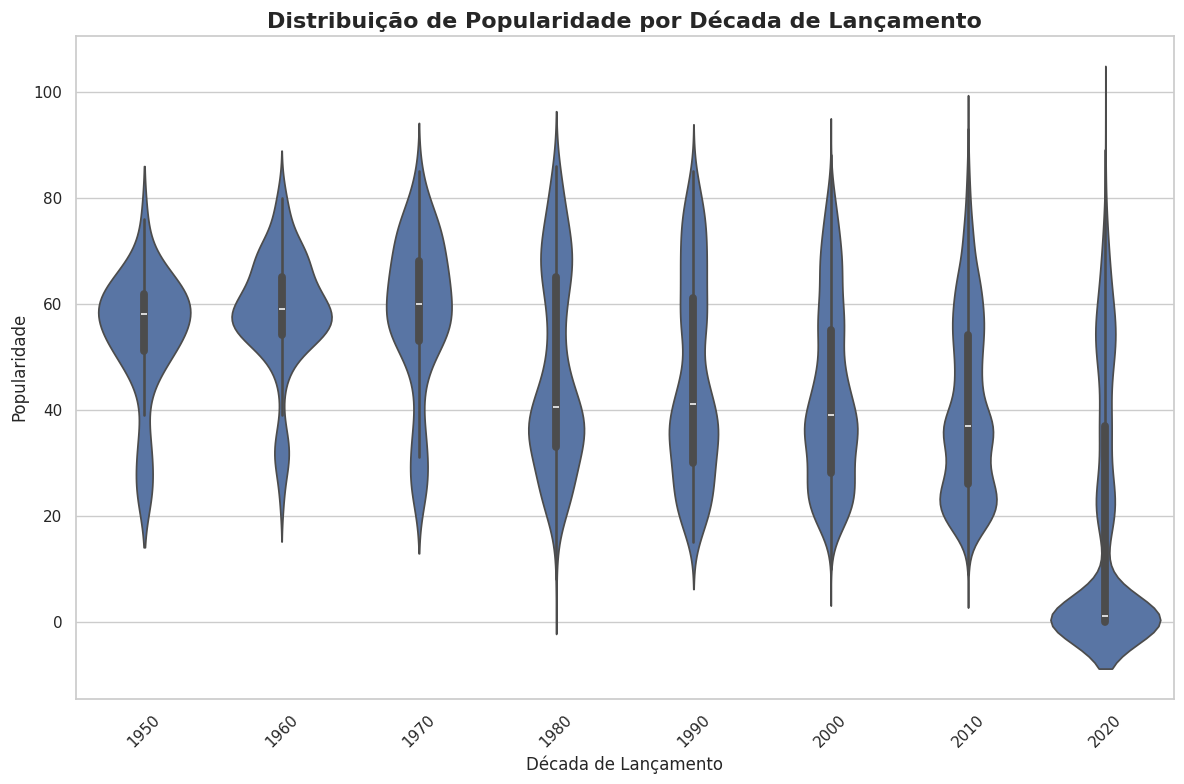

Década de 1950: 78 registros
Década de 1960: 375 registros
Década de 1970: 343 registros
Década de 1980: 558 registros
Década de 1990: 1307 registros
Década de 2000: 2641 registros
Década de 2010: 4056 registros
Década de 2020: 4453 registros


In [16]:
# Criar uma nova coluna para a década
df['decade'] = (df['release_year'] // 10) * 10  # Agrupar por décadas

# Remove rows with missing values in 'decade' column
df = df.dropna(subset=['decade'])

# Configurar o estilo do gráfico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Criar o gráfico de violino
sns.violinplot(x=df['decade'], y=df['popularity'])

# Configurações do gráfico
plt.title('Distribuição de Popularidade por Década de Lançamento', fontsize=16, fontweight='bold')
plt.xlabel('Década de Lançamento', fontsize=12)
plt.ylabel('Popularidade', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# Contar a quantidade de dados por década
decade_counts = df['decade'].value_counts().sort_index()

# Exibir a quantidade de dados por década no display
for decade, count in decade_counts.items():
    print(f"Década de {decade}: {count} registros")


# Analise da popularidade das categorias musicais e generos musicais do rock


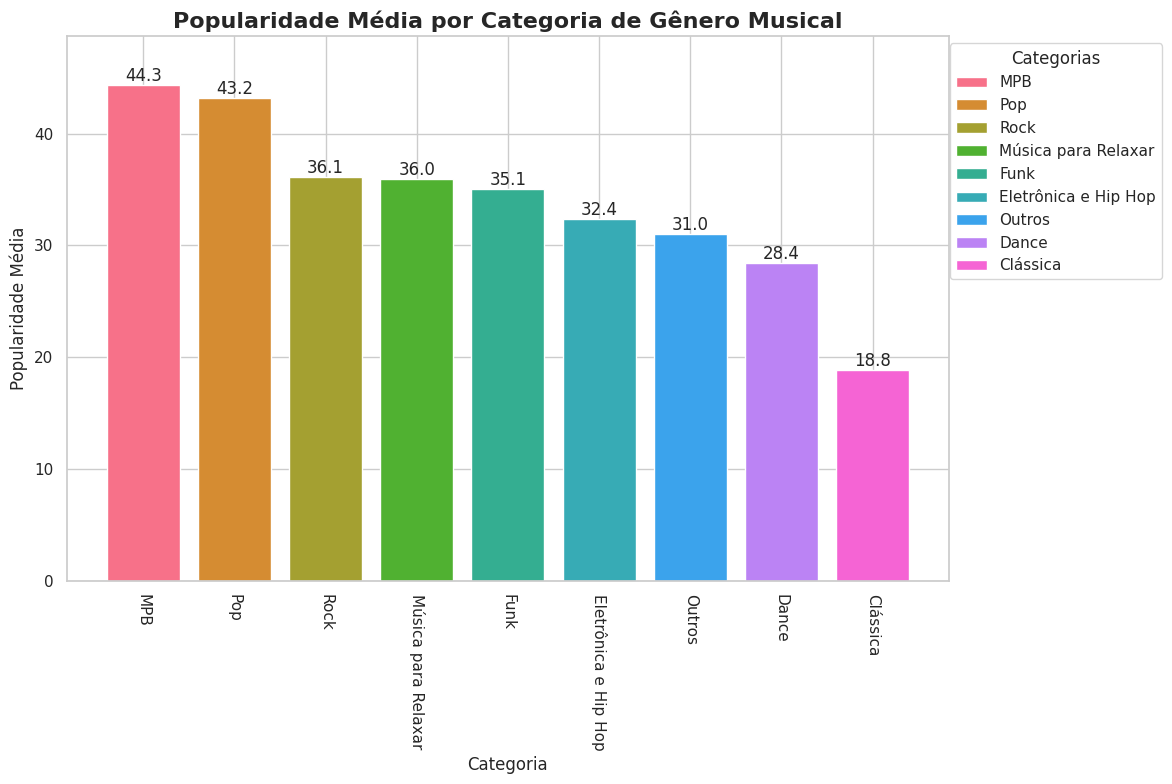

Categoria de Clássica: 2000 registros
Categoria de Dance: 6000 registros
Categoria de Eletrônica e Hip Hop: 16000 registros
Categoria de Funk: 2000 registros
Categoria de MPB: 3000 registros
Categoria de Música para Relaxar: 4000 registros
Categoria de Outros: 54000 registros
Categoria de Pop: 9000 registros
Categoria de Rock: 18000 registros


In [17]:
category_popularity = df_all.groupby('category')['popularity'].mean().sort_values(ascending=False)

# Configurar o estilo
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Criar o gráfico de barras
colors = sns.color_palette("husl", n_colors=len(category_popularity))
bars = plt.bar(category_popularity.index, category_popularity.values, color=colors)

# Personalizar o gráfico
plt.title('Popularidade Média por Categoria de Gênero Musical', fontsize=16, fontweight='bold')
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Popularidade Média', fontsize=12)
plt.ylim(0, max(category_popularity.values) * 1.1)  # Ajuste o limite do eixo y

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom')

# Rotacionar os rótulos do eixo x para 90 graus
plt.xticks(rotation=-90)

# Criar legenda
plt.legend(bars, category_popularity.index, title="Categorias", loc="upper right", bbox_to_anchor=(1.25, 1))

# Ajustar o layout e mostrar o gráfico
plt.tight_layout()
plt.show()

# Contar a quantidade de dados por categoria
category_counts = df_all['category'].value_counts().sort_index()

# Exibir a quantidade de dados por categoria no display
for category, count in category_counts.items():
    print(f"Categoria de {category}: {count} registros")

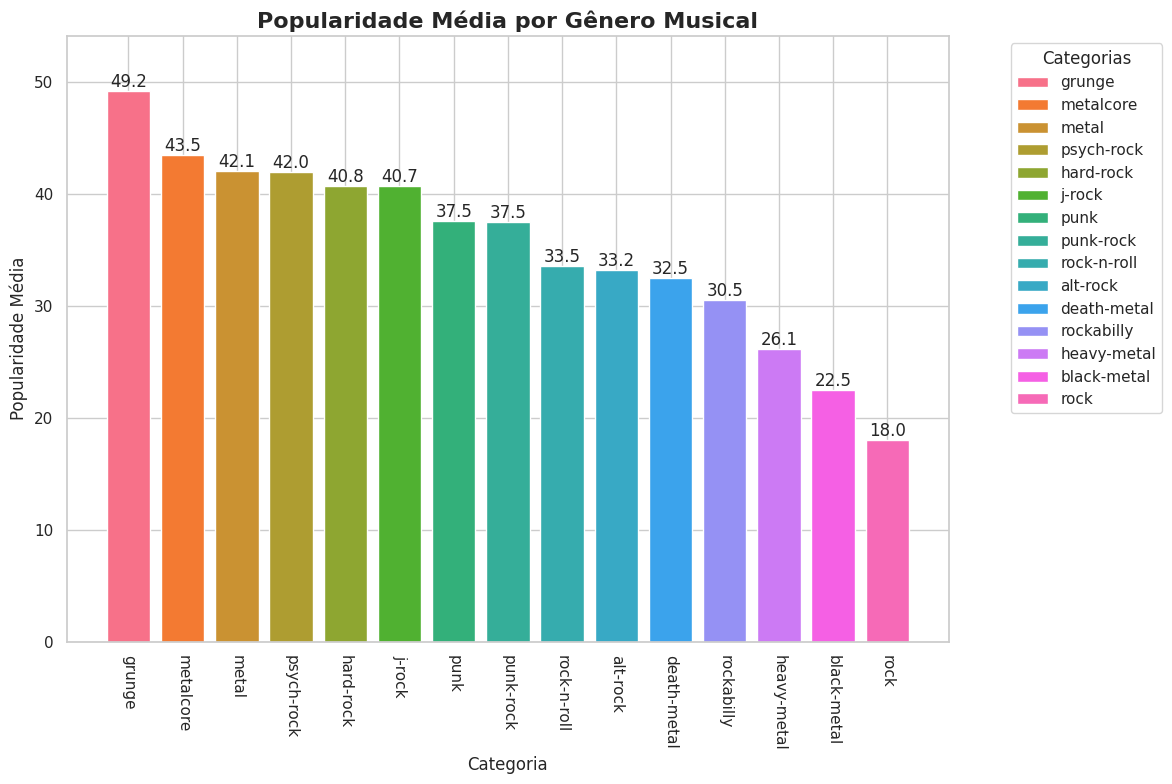

track_genre
rock           982
metalcore      981
alt-rock       968
punk           931
j-rock         928
metal          927
grunge         921
punk-rock      920
rockabilly     908
heavy-metal    900
black-metal    898
psych-rock     892
hard-rock      888
rock-n-roll    888
death-metal    879
Name: count, dtype: int64


In [18]:
category_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Configurar o estilo
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Criar o gráfico de barras
colors = sns.color_palette("husl", n_colors=len(category_popularity))
bars = plt.bar(category_popularity.index, category_popularity.values, color=colors)

# Personalizar o gráfico
plt.title('Popularidade Média por Gênero Musical', fontsize=16, fontweight='bold')
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Popularidade Média', fontsize=12)
plt.ylim(0, max(category_popularity.values) * 1.1)  # Ajuste o limite do eixo y

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom')

# Rotacionar os rótulos do eixo x para 90 graus
plt.xticks(rotation=-90)

# Criar legenda
plt.legend(bars, category_popularity.index, title="Categorias", loc="upper right", bbox_to_anchor=(1.25, 1))

# Ajustar o layout e mostrar o gráfico
plt.tight_layout()
plt.show()

# Contar a quantidade de dados por gênero musical
genre_count = df['track_genre'].value_counts()

# Exibir a quantidade de dados por categoria
print(genre_count)


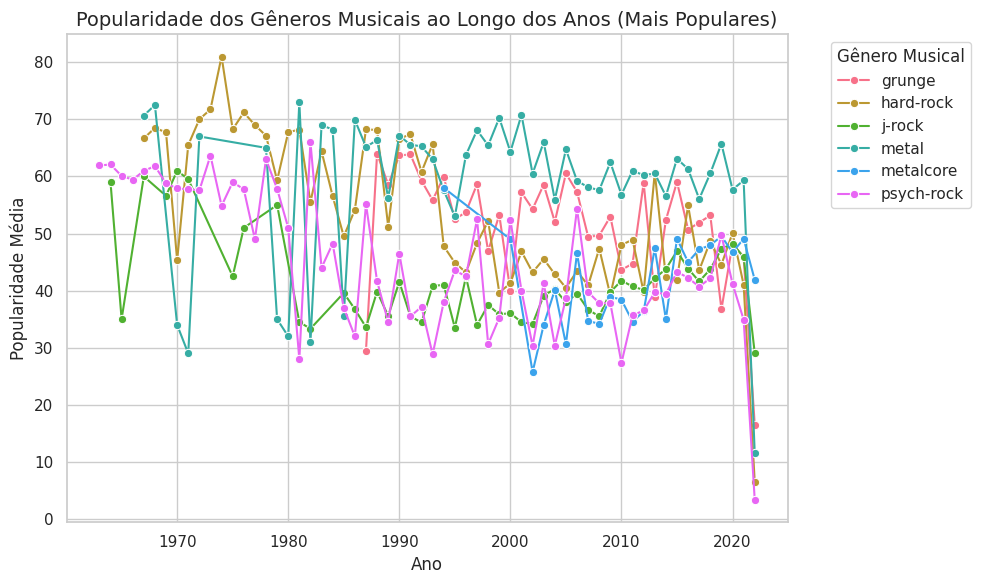

In [19]:
# Agrupar os dados por 'track_genre' e 'year', calculando a popularidade média por ano para cada gênero
grouped_df = df.groupby(['track_genre', 'release_year'])['popularity'].mean().reset_index()

# Filtrar os gêneros mais populares (ajustar o valor do limite para garantir que haja dados)
mean_popularity_by_genre = df.groupby('track_genre')['popularity'].mean()
most_popular_genres = mean_popularity_by_genre[mean_popularity_by_genre > 40].index  # Ajuste aqui se necessário
filtered_df = grouped_df[grouped_df['track_genre'].isin(most_popular_genres)]


# Criar uma paleta de cores para os gêneros mais populares
sns.set_palette('husl', n_colors=len(most_popular_genres))

# Criar o gráfico de linhas com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='popularity', hue='track_genre', data=filtered_df, marker="o")

# Adicionar título e rótulos aos eixos
plt.title('Popularidade dos Gêneros Musicais ao Longo dos Anos (Mais Populares)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Popularidade Média', fontsize=12)

# Mover a legenda para fora do gráfico
plt.legend(title='Gênero Musical', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()




# Análise do Mercado Baseada nos Sucessos Atuais
Vamos começar com as músicas que possuem o maior score de popularidade entre 2010 e 2020, verificar seu gênero e outros indicadores. Em seguida, compararemos com as músicas mais populares de outras categorias para identificar uma tendência na nova abordagem do rock.

Descrição dos Recursos de Áudio:

- Instrumentalness: Este valor representa a quantidade de vocais na música. Quanto mais próximo de 1.0, mais instrumental a música é.
- Acousticness: Este valor descreve o quão acústica é uma música. Um score de 1.0 significa que a música provavelmente é acústica.
- Liveness: Este valor descreve a probabilidade de que a música tenha sido gravada com uma audiência ao vivo. De acordo com a documentação oficial, “um valor acima de 0.8 indica uma forte probabilidade de que a faixa seja ao vivo”.
- Speechiness: “Speechiness detecta a presença de palavras faladas em uma faixa”. Se a speechiness de uma música estiver acima de 0.66, provavelmente é composta por palavras faladas; uma pontuação entre 0.33 e 0.66 indica uma música que pode conter tanto música quanto palavras; e um score abaixo de 0.33 significa que a música não tem fala.
- Energy: “(energy) representa uma medida perceptiva de intensidade e atividade. Normalmente, faixas energéticas parecem rápidas, altas e barulhentas”.
- Danceability: “Danceability descreve quão adequada uma faixa é para dançar, com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força do batimento e regularidade geral. Um valor de 0.0 é o menos dançável e 1.0 é o mais dançável”.
- Valence: “Uma medida de 0.0 a 1.0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, felizes, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, irritadas)”.

In [20]:
df_most_popular_musics = df[(df['decade'] >= 2010)]
display(df_most_popular_musics.shape)
df_most_popular_musics.drop_duplicates(subset='track_id', keep='first', inplace=True)
df_most_popular_musics = df_most_popular_musics.sort_values('popularity', ascending=False).head(40)
display(df_most_popular_musics)


(8509, 26)

/tmp/ipykernel_2974/754195449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most_popular_musics.drop_duplicates(subset='track_id', keep='first', inplace=True)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,category,release_date,release_year,release_month,release_day,decade
16003,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,0,...,0.825,139.994,4,rock,Rock,2022-05-13,2022,5,13,2020
3,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,0.398,124.053,4,alt-rock,Rock,2013-04-19,2013,4,19,2010
16001,5XeFesFbtLpXzIVDNQP22n,Arctic Monkeys,AM,I Wanna Be Yours,92,183956,False,0.464,0.417,0,...,0.479,67.528,4,rock,Rock,2013-09-09,2013,9,9,2010
16000,7DbdUf8aHSYoliSjO6LZv6,Beach Weather,Chit Chat,"Sex, Drugs, Etc.",90,196784,False,0.572,0.839,4,...,0.465,143.969,4,rock,Rock,2016-11-04,2016,11,4,2010
16254,72yP0DUlWPyH8P7IoxskwN,Elton John;Britney Spears,Hold Me Closer,Hold Me Closer,89,202245,False,0.667,0.750,0,...,0.486,126.041,4,rock,Rock,2022-08-26,2022,8,26,2020
16012,0HqZX76SFLDz2aW8aiqi7G,Imagine Dragons,Bones,Bones,89,165264,False,0.773,0.742,5,...,0.571,114.071,4,rock,Rock,2022-03-11,2022,3,11,2020
6000,2HZLXBOnaSRhXStMLrq9fD,Ghost,Seven Inches Of Satanic Panic,Mary On A Cross,88,244804,False,0.466,0.900,11,...,0.561,130.020,4,hard-rock,Rock,2019-09-13,2019,9,13,2010
16011,0pqnGHJpmpxLKifKRmU6WP,Imagine Dragons,Evolve,Believer,88,204346,False,0.776,0.780,10,...,0.666,124.949,4,rock,Rock,2017-06-23,2017,6,23,2010
16101,5FVd6KXrgO9B3JPmC8OPst,Arctic Monkeys,AM,Do I Wanna Know?,88,272394,False,0.548,0.532,5,...,0.405,85.030,4,rock,Rock,2013-09-09,2013,9,9,2010
0,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,...,0.337,85.012,4,alt-rock,Rock,2015-10-30,2015,10,30,2010


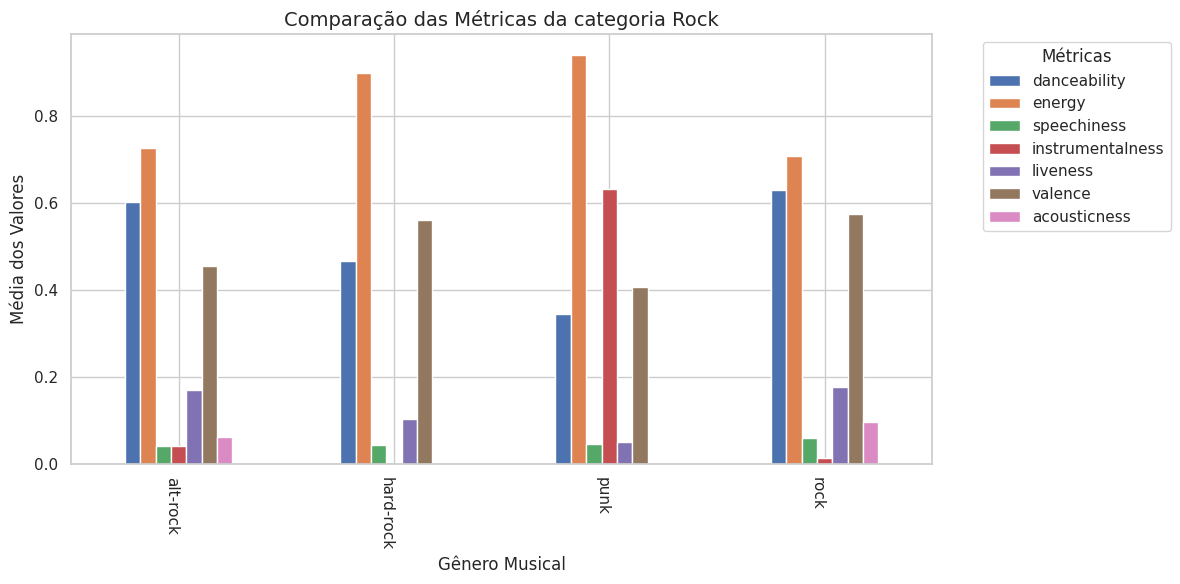

In [21]:
# Definir manualmente as cores para cada métrica, de acordo com o gráfico enviado
colors = {
    'danceability': '#4c72b0',  # Azul
    'energy': '#dd8452',        # Laranja
    'speechiness': '#55a868',   # Verde
    'instrumentalness': '#c44e52',  # Vermelho
    'liveness': '#8172b3',      # Roxo
    'valence': '#937860',       # Marrom
    'acousticness': '#da8bc3'   # Rosa
}

# Selecionar as colunas de interesse
columns_of_interest = ['danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'acousticness']

# Agrupar por gênero e calcular a média das colunas de interesse
mean_values_by_genre = df_most_popular_musics.groupby('track_genre')[columns_of_interest].mean()

# Criar o gráfico de barras com as cores manuais
ax = mean_values_by_genre.plot(kind='bar', figsize=(12, 6), color=[colors[col] for col in columns_of_interest])

# Adicionar título e rótulos aos eixos
plt.title('Comparação das Métricas da categoria Rock', fontsize=14)
plt.xlabel('Gênero Musical', fontsize=12)
plt.ylabel('Média dos Valores', fontsize=12)

# Ajustar layout para melhor visualização
plt.xticks(rotation=-90, ha='right')

# Posicionar a legenda fora do gráfico
plt.legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar o layout para que tudo caiba bem
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [22]:
df_all_most_popular_musics = df_all[df_all['category'] != 'Rock']
display(df_all_most_popular_musics.shape)
df_all_most_popular_musics.drop_duplicates(subset='track_id', keep='first', inplace=True)
df_all_most_popular_musics = df_all_most_popular_musics.sort_values('popularity', ascending=False).head(40)
display(df_all_most_popular_musics)

(96000, 21)

/tmp/ipykernel_2974/2895137547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_most_popular_musics.drop_duplicates(subset='track_id', keep='first', inplace=True)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,category
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,...,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,dance,Dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,...,1,0.0440,0.012500,0.033000,0.2300,0.550,128.033,4,hip-hop,Eletrônica e Hip Hop
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,...,0,0.0343,0.003830,0.000007,0.3710,0.304,128.040,4,dance,Dance
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,...,0,0.0364,0.583000,0.000002,0.2180,0.850,124.980,4,latin,Outros
67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,1,...,0,0.0817,0.090100,0.000027,0.0933,0.425,92.005,4,latin,Outros
67359,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,5,...,0,0.2530,0.099300,0.000291,0.1260,0.187,106.672,4,latin,Outros
67559,5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,7,...,0,0.0516,0.141000,0.000017,0.0639,0.234,98.047,4,latin,Outros
79000,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,0,...,1,0.0475,0.082600,0.000745,0.0546,0.825,139.994,4,piano,Outros
20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,9,...,0,0.0427,0.063500,0.000001,0.1050,0.310,116.992,4,dance,Dance
67500,3k3NWokhRRkEPhCzPmV8TW,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,Ojitos Lindos,95,258298,False,0.647,0.686,3,...,0,0.0413,0.080000,0.000001,0.5280,0.268,79.928,4,latin,Outros


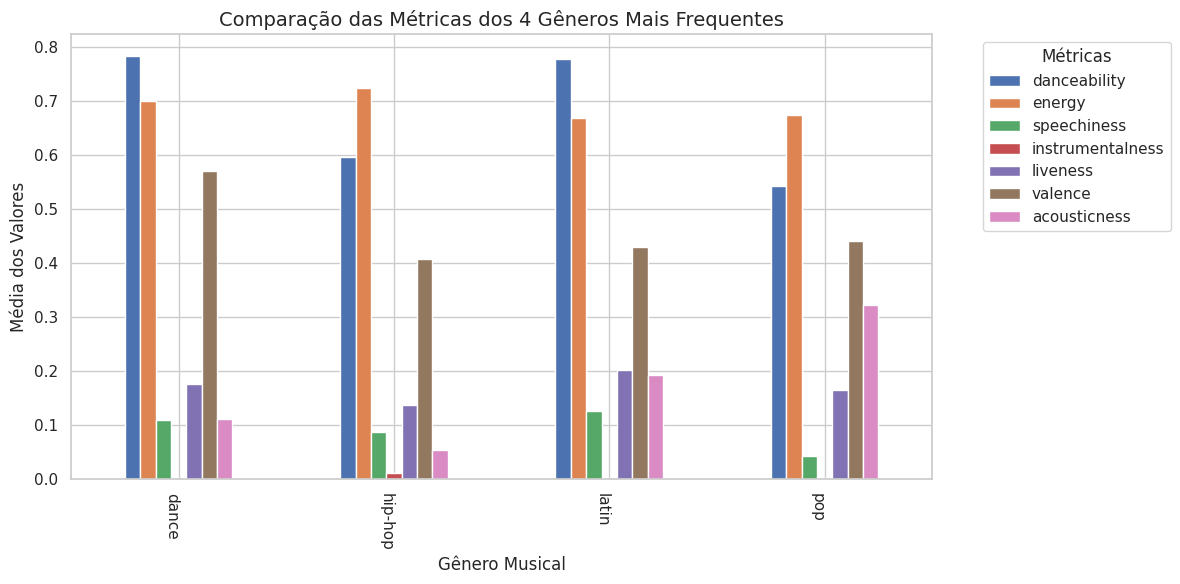

In [23]:
# Contar a quantidade de músicas por gênero e selecionar os 4 gêneros mais frequentes
top_4_genres = df_all_most_popular_musics['track_genre'].value_counts().nlargest(4).index

# Filtrar o DataFrame para incluir apenas os 4 gêneros mais frequentes
mean_values_top_4 = df_all_most_popular_musics[df_all_most_popular_musics['track_genre'].isin(top_4_genres)]

# Calcular a média das métricas para esses gêneros
mean_values_by_genre = mean_values_top_4.groupby('track_genre')[columns_of_interest].mean()

# Criar o gráfico de barras com as cores consistentes
ax = mean_values_by_genre.plot(kind='bar', figsize=(12, 6), color=[colors[col] for col in columns_of_interest])

# Adicionar título e rótulos aos eixos
plt.title('Comparação das Métricas dos 4 Gêneros Mais Frequentes', fontsize=14)
plt.xlabel('Gênero Musical', fontsize=12)
plt.ylabel('Média dos Valores', fontsize=12)

# Ajustar layout para melhor visualização
plt.xticks(rotation=-90, ha='right')

# Posicionar a legenda fora do gráfico
plt.legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar o layout para que tudo caiba bem
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Considerações Finais

O Spotify demonstra o quão poderoso é o serviço de streaming no mercado atual, que possui uma participação de 84% no mercado americano, sendo o Spotify a maior plataforma musical dentro desse segmento. A maneira como as músicas são produzidas e consumidas hoje afeta diretamente sua popularidade. O índice rotativo de popularidade do Spotify pode indicar a influência dos meios digitais sobre gostos, sentimentos e emoções que experimentamos ao ouvir as músicas contemporâneas.

Essa dinâmica gera desafios para os artistas na criação de novos hits, uma vez que a distribuição das músicas e a saturação do mercado tornam a conquista de um novo sucesso mais difícil. O rock, em particular, está passando por um processo de renovação, pois não é mais o gênero predominante na indústria. A mensagem que o rock transmitia, antes exclusiva, agora é mais acessível à população. Com o passar do tempo, o gênero precisa se reinventar continuamente para se manter relevante e acompanhar as novas tendências do mercado musical.

Um exemplo interessante de como funciona o índice de popularidade é o caso dos Beatles. Embora sejam a banda com as maiores vendas de discos da história, atualmente possuem um índice de popularidade de apenas 86. Isso ilustra a tendência de como a música é categorizada e percebida hoje, mesmo em relação a influências históricas.

Para ilustrar essa dinâmica, podemos comparar a popularidade de artistas contemporâneos, como Bruno Mars, com a dos Beatles. Apesar do impacto significativo que os Beatles tiveram na música e na cultura popular, a sua relevância no contexto atual é medida por diferentes parâmetros, refletindo a evolução do mercado musical.

- [Bruno Mars](https://app.chartmetric.com/pt/artist/3501)
- [The Beatles](https://app.chartmetric.com/pt/artist/102)

Essa comparação ressalta a necessidade de adaptação e inovação contínuas na indústria musical, especialmente em um cenário em constante mudança, onde as expectativas e preferências do público evoluem rapidamente.